# Dual Plane Analysis

### Notebook for processing and analyzing dual plane somatic and dendritic recordings

In [1]:
import os
import numpy as np
from Lab_Analyses.Dual_Plane.organize_dual_plane_data import organize_dual_plane_data
from Lab_Analyses.Dual_Plane.analyze_dual_plane_data import analyze_dual_plane_data
from Lab_Analyses.Dual_Plane import plot_dual_plane_data as plotting
from Lab_Analyses.Utilities.save_load_pickle import load_pickle, save_pickle
%matplotlib notebook

### Datasets
Specify which mice to be analyzed

In [2]:
# Mouse ids
id_1 = "JW129"
id_2 = "JW130"
id_3 = "JW167"

mouse_list = [id_2, id_3]


### Data Organization
Organize the dual plane data

In [3]:
# Reprocess?
reprocess = True

# Inputs
data_dir = "two_plane"
file_types = {"Dendrite": "dendrite", "Soma": "soma"}

# Preprocess data
for mouse in mouse_list:
    organize_dual_plane_data(mouse_id=mouse, data_dir=data_dir, file_types=file_types, reprocess=reprocess, save=True)

### Analyze dual plane data

In [4]:
# Save path
group_path = r'C:\Users\Jake\Desktop\Analyzed_data\grouped'
experiment_dir = "Dual_Spine_Imaging"
dual_plane_dir = "Dual_Plane"
dual_plane_path = os.path.join(group_path, experiment_dir, dual_plane_dir)

# Analyze
reanalyze = True
if reanalyze:
    dual_plane_data = analyze_dual_plane_data(mouse_list, save=True, save_path=dual_plane_path)
else:
    dual_plane_data = load_pickle(["analyzed_dual_plane_data"], path=dual_plane_path)[0]

Dataset number: 4


### Visualize Data

In [5]:
# Set up figure save path
initial_path = r"C:\Users\Jake\Desktop\Figures\grouped_data"
fig_path = os.path.join(initial_path, experiment_dir, dual_plane_dir)
if not os.path.isdir(fig_path):
    os.makedirs(fig_path)

In [ ]:
# Plot the traces
plotting.plot_soma_dend_traces(
    dual_plane_data,
    colors=["forestgreen", "black"],
    norm=True,
    subselect=None, 
    save=False, 
    save_path=fig_path,
)

In [ ]:
# Plot fraction coactivity
plotting.plot_soma_dend_coactivity(
    dual_plane_data,
    colors=["black", "forestgreen"],
    mean_type="mean", 
    err_type="sem",
    norm=True,
    trace_avg="dend",
    figsize=(11,5),
    save=True,
    save_path=fig_path,
)

15
Number of soma-dendrite pairs: 15
Number of dendrite-dendrite pairs: 50
Total soma-dendrite paired events: 225
Total dendrite-dendrite paired events: 701


<IPython.core.display.Javascript object>


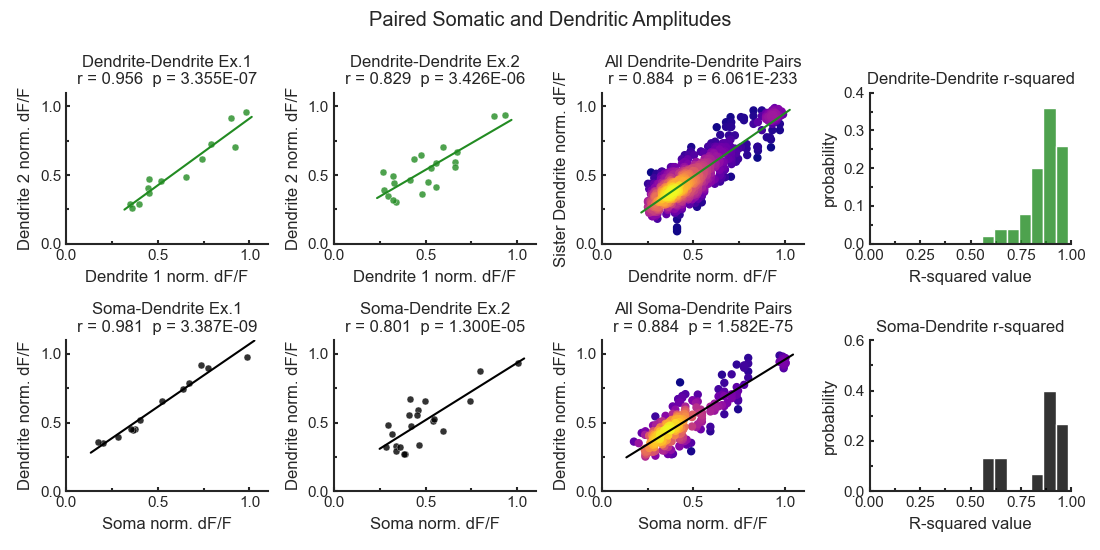

In [6]:
# Plot paired event amplitudes
plotting.plot_amplitude_correlations(
    dual_plane_data,
    norm=True,
    dend_examples=[6,11],
    soma_examples=[6,11],
    color=["forestgreen", "black"],
    figsize=(11, 5.5),
    corr_lim=(0,1.1),
    s_size=25,
    s_alpha=0.8,
    bins=7,
    save=False,
    save_path=fig_path,
)

In [ ]:
# Plot individual events
plotting.plot_ind_events(
    dual_plane_data,
    colors=["black", "forestgreen"],
    norm=True,
    event_type="noncoactive",
    figsize=(3,3),
    save=False,
    save_path=fig_path
)

In [ ]:
dual_plane_data.__dict__.keys()

In [ ]:
s_dFoF = dual_plane_data.somatic_dFoF[:, 5]

In [ ]:
smooth_window = int(15 * 0.5)
# Make sure smooth window is odd
if not smooth_window % 2:
    smooth_window = smooth_window + 1
from scipy.signal import savgol_filter
f_dFoF = savgol_filter(s_dFoF, smooth_window, 1)

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(s_dFoF[0:500])
plt.figure()
plt.plot(f_dFoF[0:500])

In [ ]:
f1.spine_groupings

In [ ]:
import numpy as np
a = np.array([1,2,3,4,2,1])
np.argmin(a)

In [ ]:
from Lab_Analyses.Spine_Analysis_v2.structural_plasticity import calculate_spine_dynamics

In [ ]:
calculate_spine_dynamics([f1.spine_flags,f2.spine_flags, f3.spine_flags], 
                         [f1.spine_positions,f2.spine_positions, f3.spine_positions], 
                         [f1.spine_groupings,f2.spine_groupings, f3.spine_groupings])

In [ ]:
a = None
if a is not None:
    print("Hello")

In [ ]:
from dataclasses import dataclass

@dataclass
class A:
    a: int
    b: int
    show: str
        
    def save(self):

        print(self.show)

In [ ]:
from Lab_Analyses.Utilities.save_load_pickle import load_pickle

load_pickle(["Hellow_World"])

In [ ]:
from Lab_Analyses.Spine_Analysis_v2.spine_volume_normalization import batch_spine_volume_normalization

In [ ]:
# Mouse ids
id_1 = "JW082"
id_2 = "JW083"
id_3 = "JW090"
id_4 = "JW092"
id_5 = "JW126"
id_6 = "JW129"
id_7 = "JW130"
id_8 = "JW150"
mouse_list = [id_1, id_2, id_3, id_4, id_5, id_6, id_7, id_8]
from timeit import default_timer as timer

start = timer()
batch_spine_volume_normalization(mouse_list, "Early", "apical", "GluSnFr", plot=True, zscore=True)
end = timer()
print(end - start) # Time in seconds, e.g. 5.38091952400282


In [ ]:
import numpy as np
a = np.array([True, False, True])
b = np.array([True, True, True])

In [ ]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"
fig, ax = plt.subplots(figsize=(5,3))
data = [4,5,6]
colors = ["darkorange", "darkviolet", "silver"]
wedges, texts, _ = ax.pie(data, wedgeprops=dict(width=0.6, alpha=0.8, linewidth=2, edgecolor="white"), autopct=lambda pct: f"{pct:.1f}%",
                                  textprops=dict(color="white", fontsize=11, weight="bold"), pctdistance=0.7, colors=colors)

ax.legend(wedges, ["enlarged", "shrunken", "stable",],
         ncol=1, 
          loc="center right",
          bbox_to_anchor=(1, 0, 0.5, 1),
         frameon=False)
ax.set_title("Test")
fig.tight_layout()

In [ ]:
from Lab_Analyses.Utilities import test_utilities as t_utils
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
data_dict = {"A": np.array([1,2,2,1,3,4,3,2,1,2]), 
             "B": np.array([10,11,12,10,14,12,15,16,17]),
             "C": np.array([-2, -1, -6, -8, -3, -4, -5, -3])}

In [ ]:
c = C([a,b])

In [ ]:
fstat, p, table, df = t_utils.kruskal_wallis_test(data_dict, "Conover", "holm-sidak")

In [ ]:
#df.style.format({'adjusted p-vals': '{:.3E}'})
df.update(df[["adjusted p-vals"]].applymap('{:.3E}'.format))

In [ ]:
test_method="holm-sidak"

In [ ]:
fig, ax = plt.subplot_mosaic([["A", "B"]], figsize=(8, 4))
ax["A"].axis('off')
ax["A"].axis('tight')
ax["A"].set_title(f"A vs B vs C Kruskal Wallis {test_method}\nF = {fstat:.4}  p = {p:.3E}")
mpl_table = ax["A"].table(cellText = df.values, colLabels=df.columns, loc="center",bbox=[0, 0.3, 0.9,0.5])
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(8)

ax["B"].axis('off')
ax["B"].axis('tight')
ax["B"].set_title("A vs B vs C Kruskal Wallis")
mpl_table2 = ax["B"].table(cellText = df.values, colLabels=df.columns, loc="center",bbox=[0, 0.3, 0.9,0.5])
mpl_table2.auto_set_font_size(False)
mpl_table2.set_fontsize(8)
fig.tight_layout()

In [ ]:
import Lab_Analyses.Plotting as plotting

In [ ]:
a = np.array([1,2,np.nan,3, 4])
b = np.array([1,2,np.nan,3, 4])

b/a

In [ ]:
import seaborn as sns

fig, axes = plt.subplot_mosaic(
"""AA""", figsize=(8,4))

axin = axes["A"].inset_axes([0.9, 0.4,0.25, 0.6])
sns.despine(ax=axin)
sns.despine()
fig.tight_layout()

In [ ]:
a = np.array([1,1,1,1,1]).reshape(-1,1)

In [ ]:
b = np.zeros(a.shape)

In [ ]:
b

In [ ]:
b[:, 0] = a.reshape(1,-1)

In [ ]:
from Lab_Analyses.Utilities.save_load_pickle import load_pickle

In [ ]:
fname = r"C:\Users\Jake\Desktop\Analyzed_data\individual\JW082\spine_data\FOV3_apical\JW082_FOV3_apical_Early_dual_spine_data"

In [ ]:
data = load_pickle([fname])

In [ ]:
data = data[0]

In [ ]:
data.__dict__.keys()

In [ ]:
data.dendrite_calcium_activity.shape

In [ ]:
data.corrected_spine_volume.shape